# Binary segmentation demo

This demo visualizes the pregenerated masks for the FungiTastic-Mini dataset.
The segmentation approach is based on GroundingDINO and the Segment Anything Model (SAM).
 For more information on how to precompute the masks, please refer to:

- [Segmentation README](README.md)
- [Generate Masks Script](generate_masks.py)



In [3]:
# always reload the notebook and imported modules
%load_ext autoreload
%autoreload 2

import os
import sys
from types import SimpleNamespace
# Get the directory of the notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Move one level up
root_dir = os.path.abspath(os.path.join(notebook_dir, "../../.."))
# Add to sys.path
sys.path.insert(0, root_dir)

from scripts.baselines.seg.generate_masks import im2mask_path
from dataset.fungi import FungiTastic

from PIL import Image
import yaml
import matplotlib.pyplot as plt

# load config and generate masks
cfg_path = '/home.stud/janoukl1/projects/fungi_code_public/FungiTastic/scripts/baselines/seg/config/private.yaml'

# load config
with open(cfg_path, 'r') as f:
    cfg = yaml.safe_load(f)

cfg = SimpleNamespace(**cfg)

# load dataset
dataset = FungiTastic(
    root=cfg.data_path,
    split='val',
    size='300',
    task='closed',
    data_subset='Mini',
    transform=None,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Visualize the precomputed masks

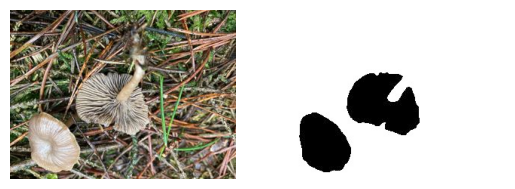

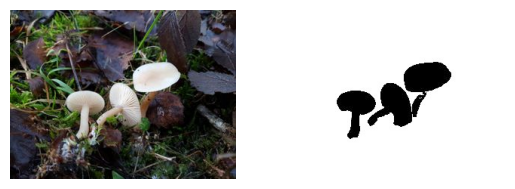

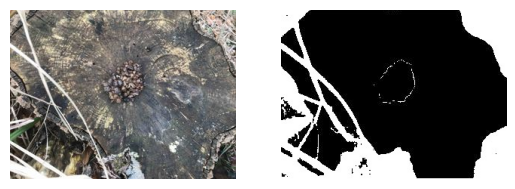

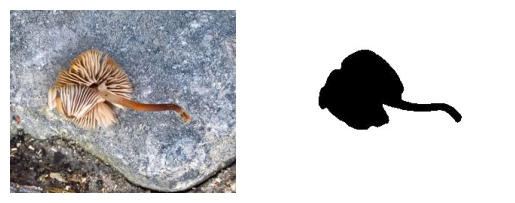

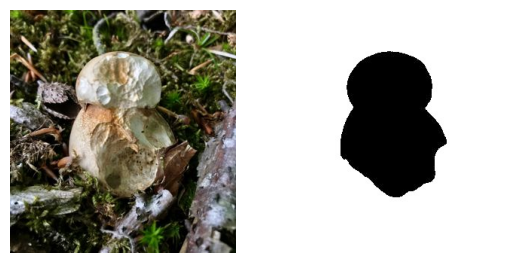

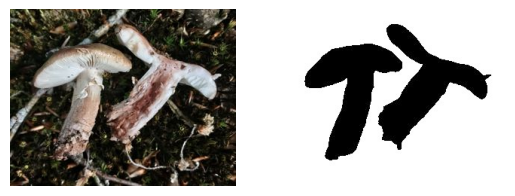

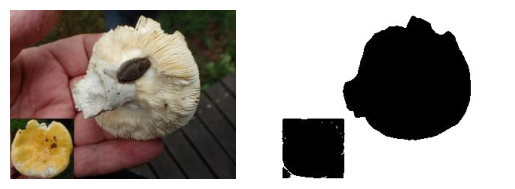

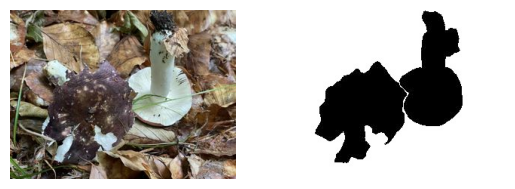

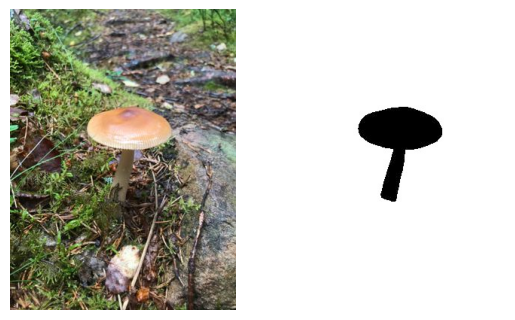

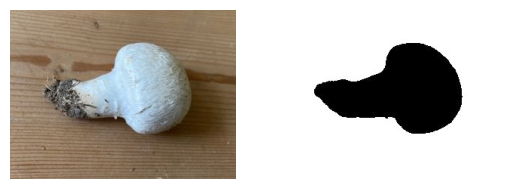

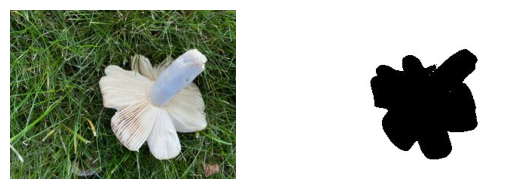

In [4]:
import numpy as np
# visualize the precomputed masks
for idx in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    img, class_id, file_path = dataset[idx]
    mask_path = im2mask_path(file_path, cfg.mask_path, dataset.img_root)
    pred_mask = Image.open(mask_path)

    #  show image and mask side by side
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask)
    plt.axis('off')
    plt.show()
